In [72]:
%load_ext autoreload
%load_ext lab_black

%autoreload 2

import admix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [73]:
data_dir = "/u/project/pasaniuc/ziqixu09/admix-prs-uncertainty/summary_info/"

In [84]:
df_info = pd.read_csv(join(data_dir, "chr22_h2_0.5_cau_0.1.sim_0.csv.gz"), index_col=0)
intercept = df_info.GV.mean() - df_info["PRS_MEAN"].mean()
for col in ["PRS_MEAN", "PRS_LOWER", "PRS_UPPER"]:
    df_info[col] += intercept

In [85]:
for pop in ["EUR", "ADMIX"]:
    df_subset = df_info[df_info.POP == pop]
    coverage = np.mean(
        (df_subset.PRS_LOWER <= df_subset.GV) & (df_subset.GV < df_subset.PRS_UPPER)
    )
    print(pop, coverage)

EUR 0.9996236356793377
ADMIX 0.9754799907471663


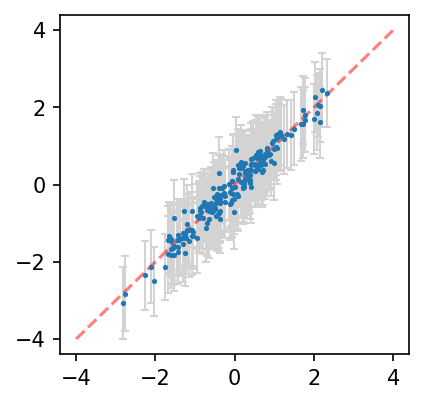

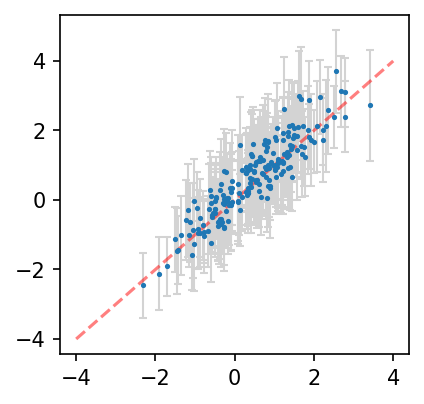

In [86]:
for pop in ["EUR", "ADMIX"]:
    df_subset = df_info[df_info.POP == pop].sample(n=200)

    fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
    ax.errorbar(
        x=df_subset.GV,
        y=df_subset.PRS_MEAN,
        yerr=(
            df_subset.PRS_MEAN - df_subset.PRS_LOWER,
            df_subset.PRS_UPPER - df_subset.PRS_MEAN,
        ),
        ecolor="lightgray",
        fmt=".",
        markersize=3,
        elinewidth=1.0,
        capsize=2,
    )
    plt.plot([-4, 4], [-4, 4], color="red", ls="--", alpha=0.5)

In [ ]:
def calibrate

Recalibration procedure 

In [83]:
from scipy.stats import pearsonr

In [79]:
pearsonr(df_info["GV"], df_info["PRS_MEAN"])[0] ** 2

0.9172381332731316